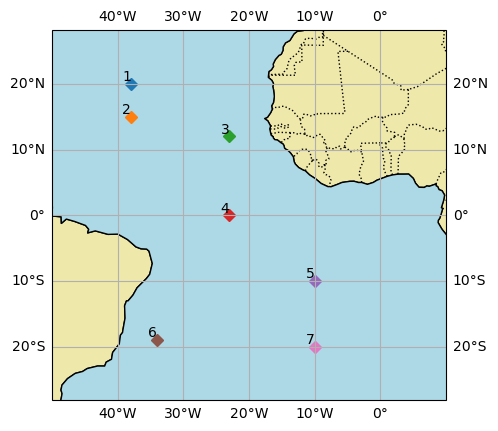

<Figure size 640x480 with 0 Axes>

In [5]:
import glob
import netCDF4 as nc
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Função para ler as coordenadas lat/lon de um arquivo NetCDF e fechá-lo após uso
def ler_coordenadas(arquivo):
    ds = nc.Dataset(arquivo)
    lat = ds.variables['lat'][:]  # Certifique-se de que 'lat' corresponde ao nome correto da variável de latitude
    lon = ds.variables['lon'][:]  # Certifique-se de que 'lon' corresponde ao nome correto da variável de longitude
    ds.close()  # Boa prática: fechar o arquivo após uso
    return lat, lon, arquivo

# Caminho para a pasta contendo os arquivos NetCDF
caminho_pasta = "/home/leticia/Documentos/MESTRADO/quali/Dados/dados_boias_unidos/*_modificado.cdf"
arquivos_netCDF = glob.glob(caminho_pasta)

# Ler coordenadas de todos os arquivos para ordená-los
coordenadas_arquivos = [ler_coordenadas(arquivo) for arquivo in arquivos_netCDF]

# Ordenar os arquivos pela latitude, do maior (norte) para o menor (sul)
arquivos_ordenados = sorted(coordenadas_arquivos, key=lambda x: x[0], reverse=True)

# Criar a figura e o subplot com projeção PlateCarree (mapa)
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Adicionando imagens de satélite ou recursos naturais para oceano e continente
#ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor=cfeature.COLORS['land']))
#ax.add_feature(cfeature.NaturalEarthFeature('physical', 'ocean', '50m', edgecolor='face', facecolor=cfeature.COLORS['water']))

ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='palegoldenrod')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

# Adicionando os recursos do mapa
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_extent([-50, 10, -25, 25])  # Ajuste os limites para focar no Oceano Atlântico

# Adicionando linhas de grade
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Loop para ler cada arquivo ordenado, extrair as coordenadas, plotar no mapa e adicionar um número
for i, (lat, lon, arquivo) in enumerate(arquivos_ordenados):
    ax.plot(lon, lat, 'D', transform=ccrs.Geodetic())  # 'ro' cria pontos vermelhos
    ax.text(lon, lat, str(i+1), transform=ccrs.Geodetic(), ha='right', va='bottom')

plt.show()

plt.savefig("/home/leticia/Documentos/MESTRADO/quali/Dados/mapa_boias_pirata.png")


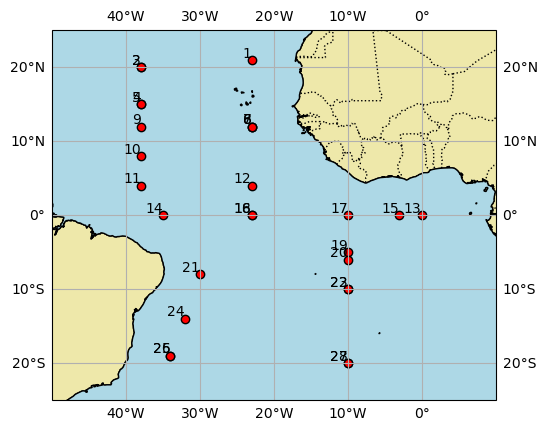

<Figure size 640x480 with 0 Axes>

In [2]:
import glob
import netCDF4 as nc
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Função para ler as coordenadas lat/lon de um arquivo NetCDF e fechá-lo após uso
def ler_coordenadas(arquivo):
    ds = nc.Dataset(arquivo)
    lat = ds.variables['lat'][:]  # Certifique-se de que 'lat' corresponde ao nome correto da variável de latitude
    lon = ds.variables['lon'][:]  # Certifique-se de que 'lon' corresponde ao nome correto da variável de longitude
    ds.close()
    return lat, lon, arquivo

# Caminho para a pasta contendo os arquivos NetCDF
caminho_pasta = "/home/leticia/Documentos/MESTRADO/quali/Dados/dados_boias_unidos/*.cdf"
arquivos_netCDF = glob.glob(caminho_pasta)

# Ler e ordenar coordenadas dos arquivos
coordenadas_arquivos = [ler_coordenadas(arquivo) for arquivo in arquivos_netCDF]
arquivos_ordenados = sorted(coordenadas_arquivos, key=lambda x: x[0], reverse=True)

# Criar a figura e o subplot com projeção PlateCarree (mapa)
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Adicionar recursos de terra e água com cores explícitas
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='palegoldenrod')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

# Adicionando linhas de costa, fronteiras e grades
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Definir os limites do mapa
ax.set_extent([-50, 10, -25, 25], crs=ccrs.PlateCarree())

# Loop para plotar marcadores e números
for i, (lat, lon, arquivo) in enumerate(arquivos_ordenados):
    ax.plot(lon, lat, 'o', color='red', markersize=6,markeredgecolor='black', transform=ccrs.Geodetic())
    ax.text(lon, lat, str(i+1), transform=ccrs.Geodetic(), ha='right', va='bottom')

plt.show()

plt.savefig("/home/leticia/Documentos/MESTRADO/quali/Parametrizacoes/coare/mapa_boias.png")
